In [1]:
##### Decoding of stimulus identity (time-course)

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import import_ipynb
import func_analysis
import func_format

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from scipy import stats


importing Jupyter notebook from func_analysis.ipynb
importing Jupyter notebook from func_format.ipynb


In [68]:
def LDAstartstopvalues(resultsfiles):
    
    resultsall = np.zeros(7)
    allstartpredicted = np.zeros(300)
    allstoppredicted = np.zeros(300)
    allstartactual = np.zeros(300)
    allstopactual = np.zeros(300)
    
    ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
    date = ['13042019', '01102019', '27062020', '06072020']

    for f, file in enumerate(resultsfiles):

        Aresults = np.loadtxt(file, delimiter = ',', dtype = str)


        for i, inte in enumerate(np.unique(Aresults[:,-2])):

            intresults = Aresults[Aresults[:,-2] == inte]

            before = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'before'))]
            during = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'during'))]
            after = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'after'))]

            beforepredicted = np.array(before[:,2], float)
            beforeactual = np.array(before[:,4], float)

            duringpredicted = np.array(during[:,2], float)
            duringactual = np.array(during[:,4], float)

            afterpredicted = np.array(after[:,2], float)
            afteractual = np.array(after[:,4], float)

            start = intresults[:300]
            stop = intresults[-300:]

            predictedstart = np.array(start[:,2], np.float)
            actualstart = np.array(start[:,4], np.float)

            predictedstop = np.array(stop[:,2], np.float)
            actualstop = np.array(stop[:,4], np.float)

            allstartpredicted = np.vstack((allstartpredicted, predictedstart))
            allstartactual = np.vstack((allstartactual, actualstart))

            allstoppredicted = np.vstack((allstoppredicted, predictedstop))
            allstopactual = np.vstack((allstopactual, actualstop))


            results = np.hstack((inte, ratID[f], date[f], intresults[0][-1], metrics.balanced_accuracy_score(beforeactual, beforepredicted), metrics.balanced_accuracy_score(duringactual, duringpredicted), metrics.balanced_accuracy_score(afteractual, afterpredicted)))

            resultsall = np.vstack((resultsall, results))
            #print(duringpredicted.shape)


    resultsall = resultsall[1:]
    allstartpredicted = allstartpredicted[1:]
    allstartactual = allstartactual[1:]
    allstoppredicted = allstoppredicted[1:]
    allstopactual = allstopactual[1:]
    
    A6actualstart = allstartactual[resultsall[:,1] == 'Amygdala6'].T
    A6predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala6'].T

    A6actualstop = allstopactual[resultsall[:,1] == 'Amygdala6'].T
    A6predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala6'].T

    A8actualstart = allstartactual[resultsall[:,1] == 'Amygdala8'].T
    A8predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala8'].T

    A8actualstop = allstopactual[resultsall[:,1] == 'Amygdala8'].T
    A8predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala8'].T

    A10actualstart = allstartactual[resultsall[:,1] == 'Amygdala10'].T
    A10predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala10'].T

    A10actualstop = allstopactual[resultsall[:,1] == 'Amygdala10'].T
    A10predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala10'].T

    A11actualstart = allstartactual[resultsall[:,1] == 'Amygdala11'].T
    A11predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala11'].T

    A11actualstop = allstopactual[resultsall[:,1] == 'Amygdala11'].T
    A11predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala11'].T
    
    A6balancedaccuracystart = []
    A6balancedaccuracystop = []
    for x, row in enumerate(A6actualstart):

        A6balancedaccuracystart = np.append(A6balancedaccuracystart, metrics.balanced_accuracy_score(row, A6predictedstart[x]))

    for x, row in enumerate(A6actualstop):

        A6balancedaccuracystop = np.append(A6balancedaccuracystop, metrics.balanced_accuracy_score(row, A6predictedstop[x]))

    A8balancedaccuracystart = []
    A8balancedaccuracystop = []
    for x, row in enumerate(A8actualstart):
        A8balancedaccuracystart = np.append(A8balancedaccuracystart, metrics.balanced_accuracy_score(row, A8predictedstart[x]))
    for x, row in enumerate(A8actualstop):
        A8balancedaccuracystop = np.append(A8balancedaccuracystop, metrics.balanced_accuracy_score(row, A8predictedstop[x]))

    A10balancedaccuracystart = []
    A10balancedaccuracystop = []
    for x, row in enumerate(A10actualstart):
        A10balancedaccuracystart = np.append(A10balancedaccuracystart, metrics.balanced_accuracy_score(row, A10predictedstart[x]))
    for x, row in enumerate(A10actualstop):
        A10balancedaccuracystop = np.append(A10balancedaccuracystop, metrics.balanced_accuracy_score(row, A10predictedstop[x]))

    A11balancedaccuracystart = []
    A11balancedaccuracystop = []
    for x, row in enumerate(A11actualstart):
        A11balancedaccuracystart = np.append(A11balancedaccuracystart, metrics.balanced_accuracy_score(row, A11predictedstart[x]))
    for x, row in enumerate(A11actualstop):
        A11balancedaccuracystop = np.append(A11balancedaccuracystop, metrics.balanced_accuracy_score(row, A11predictedstop[x]))
        
    return(A6balancedaccuracystart, A8balancedaccuracystart, A10balancedaccuracystart, A11balancedaccuracystart, A6balancedaccuracystop, A8balancedaccuracystop, A10balancedaccuracystop, A11balancedaccuracystop)


array([0.896])

In [70]:
[A6startallneurons, A8startallneurons, A10startallneurons, A11startallneurons,
A6stopallneurons, A8stopallneurons, A10stopallneurons, A11stopallneurons] = LDAstartstopvalues(['F:/Figure3_New/LDAovertime/Amygdala6_LDAresults_persecond_allneurons.csv',
               'F:/Figure3_New/LDAovertime/Amygdala8_LDAresults_persecond_allneurons.csv',
               'F:/Figure3_New/LDAovertime/Amygdala10_LDAresults_persecond_allneurons.csv',
               'F:/Figure3_New/LDAovertime/Amygdala11_LDAresults_persecond_allneurons.csv'])

[A6startexcludeuni, A8startexcludeuni, A10startexcludeuni, A11startexcludeuni,
A6stopexcludeuni, A8stopexcludeuni, A10stopexcludeuni, A11stopexcludeuni] = LDAstartstopvalues(['F:/Figure3_New/LDAovertime/Amygdala6_LDAresults_persecond_excludingunimodal.csv', 'F:/Figure3_New/LDAovertime/Amygdala8_LDAresults_persecond_excludingunimodal.csv', 'F:/Figure3_New/LDAovertime/Amygdala10_LDAresults_persecond_excludingunimodal.csv', 'F:/Figure3_New/LDAovertime/Amygdala11_LDAresults_persecond_excludingunimodal.csv'])

[A6startexcludepan, A8startexcludepan, A10startexcludepan, A11startexcludepan, 
A6stopexcludepan, A8stopexcludepan, A10stopexcludepan, A11stopexcludepan] = LDAstartstopvalues(['F:/Figure3_New/LDAovertime/Amygdala6_LDAresults_persecond_excludingpanresponsive.csv', 'F:/Figure3_New/LDAovertime/Amygdala8_LDAresults_persecond_excludingpanresponsive.csv', 'F:/Figure3_New/LDAovertime/Amygdala10_LDAresults_persecond_excludingpanresponsive.csv', 'F:/Figure3_New/LDAovertime/Amygdala11_LDAresults_persecond_excludingpanresponsive.csv'])

[A6startexcludenon, A8startexcludenon, A10startexcludenon, A11startexcludenon,
A6stopexcludenon, A8stopexcludenon, A10stopexcludenon, A11stopexcludenon] = LDAstartstopvalues([
    'F:/Figure3_New/LDAovertime/Amygdala6_LDAresults_persecond_responsiveonly.csv',
    'F:/Figure3_New/LDAovertime/Amygdala8_LDAresults_persecond_responsiveonly.csv', 
    'F:/Figure3_New/LDAovertime/Amygdala10_LDAresults_persecond_responsiveonly.csv', 
    'F:/Figure3_New/LDAovertime/Amygdala11_LDAresults_persecond_responsiveonly.csv'])

C:\Users\Cristina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


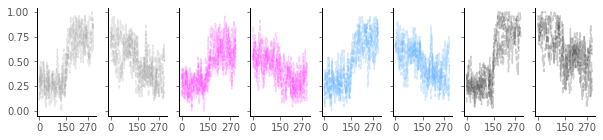

In [89]:
fig, ax = plt.subplots(1,8, figsize = (10,2), sharex = True, sharey = True)

ax[0].plot(A6startallneurons, color = 'gray', linestyle = '--', alpha = 0.2)
ax[0].plot(A8startallneurons, color = 'gray', linestyle = '--', alpha = 0.2)
ax[0].plot(A10startallneurons, color = 'gray', linestyle = '--', alpha = 0.2)
ax[0].plot(A11startallneurons, color = 'gray', linestyle = '--', alpha = 0.2)

ax[1].plot(A6stopallneurons, color = 'gray', linestyle = '--', alpha = 0.2)
ax[1].plot(A8stopallneurons, color = 'gray', linestyle = '--', alpha = 0.2)
ax[1].plot(A10stopallneurons, color = 'gray', linestyle = '--', alpha = 0.2)
ax[1].plot(A11stopallneurons, color = 'gray', linestyle = '--', alpha = 0.2)

ax[2].plot(A6startexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)
ax[2].plot(A8startexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)
ax[2].plot(A10startexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)
ax[2].plot(A11startexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)

ax[3].plot(A6stopexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)
ax[3].plot(A8stopexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)
ax[3].plot(A10stopexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)
ax[3].plot(A11stopexcludeuni, color = 'magenta', linestyle = '--', alpha = 0.2)

ax[4].plot(A6startexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)
ax[4].plot(A8startexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)
ax[4].plot(A10startexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)
ax[4].plot(A11startexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)

ax[5].plot(A6stopexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)
ax[5].plot(A8stopexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)
ax[5].plot(A10stopexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)
ax[5].plot(A11stopexcludepan, color = 'dodgerblue', linestyle = '--', alpha = 0.2)

ax[6].plot(A6startexcludenon, color = 'k', linestyle = '--', alpha = 0.2)
ax[6].plot(A8startexcludenon, color = 'k', linestyle = '--', alpha = 0.2)
ax[6].plot(A10startexcludenon, color = 'k', linestyle = '--', alpha = 0.2)
ax[6].plot(A11startexcludenon, color = 'k', linestyle = '--', alpha = 0.2)

ax[7].plot(A6stopexcludenon, color = 'k', linestyle = '--', alpha = 0.2)
ax[7].plot(A8stopexcludenon, color = 'k', linestyle = '--', alpha = 0.2)
ax[7].plot(A10stopexcludenon, color = 'k', linestyle = '--', alpha = 0.2)
ax[7].plot(A11stopexcludenon, color = 'k', linestyle = '--', alpha = 0.2)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
ax[3].grid(False)
ax[4].grid(False)
ax[5].grid(False)
ax[6].grid(False)
ax[7].grid(False)

ax[0].set_facecolor('white')
ax[0].spines['left'].set_color('k')
ax[0].spines['bottom'].set_color('k')
ax[1].set_facecolor('white')
ax[1].spines['left'].set_color('k')
ax[1].spines['bottom'].set_color('k')
ax[2].set_facecolor('white')
ax[2].spines['left'].set_color('k')
ax[2].spines['bottom'].set_color('k')
ax[3].set_facecolor('white')
ax[3].spines['left'].set_color('k')
ax[3].spines['bottom'].set_color('k')
ax[4].set_facecolor('white')
ax[4].spines['left'].set_color('k')
ax[4].spines['bottom'].set_color('k')
ax[5].set_facecolor('white')
ax[5].spines['left'].set_color('k')
ax[5].spines['bottom'].set_color('k')
ax[6].set_facecolor('white')
ax[6].spines['left'].set_color('k')
ax[6].spines['bottom'].set_color('k')
ax[7].set_facecolor('white')
ax[7].spines['left'].set_color('k')
ax[7].spines['bottom'].set_color('k')

ax[0].set_xticks((0, 150, 270))

In [77]:
A6after_unicontribution = (A6stopexcludeuni - A6stopallneurons)
A8after_unicontribution = (A8stopexcludeuni - A8stopallneurons)
A10after_unicontribution = (A10stopexcludeuni - A10stopallneurons)
A11after_unicontribution = (A11stopexcludeuni - A11stopallneurons)

In [78]:
A6after_pancontribution = (A6stopexcludepan - A6stopallneurons)
A8after_pancontribution = (A8stopexcludepan - A8stopallneurons)
A10after_pancontribution = (A10stopexcludepan - A10stopallneurons)
A11after_pancontribution = (A11stopexcludepan - A11stopallneurons)

In [79]:
A6after_noncontribution = (A6stopexcludenon - A6stopallneurons)
A8after_noncontribution = (A8stopexcludenon - A8stopallneurons)
A10after_noncontribution = (A10stopexcludenon - A10stopallneurons)
A11after_noncontribution = (A11stopexcludenon - A11stopallneurons)

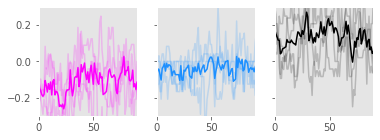

In [104]:
fig, ax = plt.subplots(1,3, figsize = (6,2), sharex = True, sharey = True)

ax[0].plot(A6after_unicontribution, color = 'magenta', alpha = 0.2)
ax[0].plot(A8after_unicontribution, color = 'magenta', alpha = 0.2)
ax[0].plot(A10after_unicontribution, color = 'magenta', alpha = 0.2)
ax[0].plot(A11after_unicontribution, color = 'magenta', alpha = 0.2)
ax[0].plot(np.mean(np.vstack((A6after_unicontribution, A8after_unicontribution, A10after_unicontribution, A11after_unicontribution)), axis = 0), color = 'magenta')

ax[0].grid(False)

ax[1].plot(A6after_pancontribution, color = 'dodgerblue', alpha = 0.2)
ax[1].plot(A8after_pancontribution, color = 'dodgerblue', alpha = 0.2)
ax[1].plot(A10after_pancontribution, color = 'dodgerblue', alpha = 0.2)
ax[1].plot(A11after_pancontribution, color = 'dodgerblue', alpha = 0.2)
ax[1].plot(np.mean(np.vstack((A6after_pancontribution, A8after_pancontribution, A10after_pancontribution, A11after_pancontribution)), axis = 0), color = 'dodgerblue')

ax[1].grid(False)

ax[2].plot(A6after_noncontribution, color = 'k', alpha = 0.2)
ax[2].plot(A8after_noncontribution, color = 'k', alpha = 0.2)
ax[2].plot(A10after_noncontribution, color = 'k', alpha = 0.2)
ax[2].plot(A11after_noncontribution, color = 'k', alpha = 0.2)
ax[2].plot(np.mean(np.vstack((A6after_noncontribution, A8after_noncontribution, A10after_noncontribution, A11after_noncontribution)), axis = 0), color = 'k')

ax[2].grid(False)

ax[2].set_xlim(0,90)
ax[2].set_ylim(-.3, .3)
plt.show()

In [102]:
print(np.mean(A6after_noncontribution[150:210]))
print(np.mean(A8after_noncontribution[150:210]))
print(np.mean(A10after_noncontribution[150:210]))
print(np.mean(A11after_noncontribution[150:210]))

0.16597222222222224
0.1677083333333333
-0.021527777777777764
0.06944444444444443


In [2]:
resultsall = np.zeros(7)
allstartpredicted = np.zeros(300)
allstoppredicted = np.zeros(300)
allstartactual = np.zeros(300)
allstopactual = np.zeros(300)

resultsfiles = ['F:/Figure3_New/LDAovertime/Amygdala6_LDAresults_persecond_allneurons.csv',
               'F:/Figure3_New/LDAovertime/Amygdala8_LDAresults_persecond_allneurons.csv',
               'F:/Figure3_New/LDAovertime/Amygdala10_LDAresults_persecond_allneurons.csv',
               'F:/Figure3_New/LDAovertime/Amygdala11_LDAresults_persecond_allneurons.csv']
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']

for f, file in enumerate(resultsfiles):
    
    Aresults = np.loadtxt(file, delimiter = ',', dtype = str)


    for i, inte in enumerate(np.unique(Aresults[:,-2])):
        
        intresults = Aresults[Aresults[:,-2] == inte]
        
        before = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'before'))]
        during = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'during'))]
        after = Aresults[np.where((Aresults[:,-2] == inte) & (Aresults[:,3] == 'after'))]

        beforepredicted = np.array(before[:,2], float)
        beforeactual = np.array(before[:,4], float)

        duringpredicted = np.array(during[:,2], float)
        duringactual = np.array(during[:,4], float)

        afterpredicted = np.array(after[:,2], float)
        afteractual = np.array(after[:,4], float)
        
        start = intresults[:300]
        stop = intresults[-300:]
        
        predictedstart = np.array(start[:,2], np.float)
        actualstart = np.array(start[:,4], np.float)
        
        predictedstop = np.array(stop[:,2], np.float)
        actualstop = np.array(stop[:,4], np.float)
        
        allstartpredicted = np.vstack((allstartpredicted, predictedstart))
        allstartactual = np.vstack((allstartactual, actualstart))
        
        allstoppredicted = np.vstack((allstoppredicted, predictedstop))
        allstopactual = np.vstack((allstopactual, actualstop))
        
        
        results = np.hstack((inte, ratID[f], date[f], intresults[0][-1], metrics.balanced_accuracy_score(beforeactual, beforepredicted), metrics.balanced_accuracy_score(duringactual, duringpredicted), metrics.balanced_accuracy_score(afteractual, afterpredicted)))

        resultsall = np.vstack((resultsall, results))
        #print(duringpredicted.shape)
        
        
resultsall = resultsall[1:]
allstartpredicted = allstartpredicted[1:]
allstartactual = allstartactual[1:]
allstoppredicted = allstoppredicted[1:]
allstopactual = allstopactual[1:]

    
    
    

C:\Users\Cristina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [3]:
A6actualstart = allstartactual[resultsall[:,1] == 'Amygdala6'].T
A6predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala6'].T

A6actualstop = allstopactual[resultsall[:,1] == 'Amygdala6'].T
A6predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala6'].T

A8actualstart = allstartactual[resultsall[:,1] == 'Amygdala8'].T
A8predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala8'].T

A8actualstop = allstopactual[resultsall[:,1] == 'Amygdala8'].T
A8predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala8'].T

A10actualstart = allstartactual[resultsall[:,1] == 'Amygdala10'].T
A10predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala10'].T

A10actualstop = allstopactual[resultsall[:,1] == 'Amygdala10'].T
A10predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala10'].T

A11actualstart = allstartactual[resultsall[:,1] == 'Amygdala11'].T
A11predictedstart = allstartpredicted[resultsall[:,1] == 'Amygdala11'].T

A11actualstop = allstopactual[resultsall[:,1] == 'Amygdala11'].T
A11predictedstop = allstoppredicted[resultsall[:,1] == 'Amygdala11'].T


In [4]:
A6balancedaccuracystart = []
A6balancedaccuracystop = []
for x, row in enumerate(A6actualstart):
    
    A6balancedaccuracystart = np.append(A6balancedaccuracystart, metrics.balanced_accuracy_score(row, A6predictedstart[x]))
    
for x, row in enumerate(A6actualstop):
    
    A6balancedaccuracystop = np.append(A6balancedaccuracystop, metrics.balanced_accuracy_score(row, A6predictedstop[x]))
    
A8balancedaccuracystart = []
A8balancedaccuracystop = []
for x, row in enumerate(A8actualstart):
    A8balancedaccuracystart = np.append(A8balancedaccuracystart, metrics.balanced_accuracy_score(row, A8predictedstart[x]))
for x, row in enumerate(A8actualstop):
    A8balancedaccuracystop = np.append(A8balancedaccuracystop, metrics.balanced_accuracy_score(row, A8predictedstop[x]))
    
A10balancedaccuracystart = []
A10balancedaccuracystop = []
for x, row in enumerate(A10actualstart):
    A10balancedaccuracystart = np.append(A10balancedaccuracystart, metrics.balanced_accuracy_score(row, A10predictedstart[x]))
for x, row in enumerate(A10actualstop):
    A10balancedaccuracystop = np.append(A10balancedaccuracystop, metrics.balanced_accuracy_score(row, A10predictedstop[x]))
    
A11balancedaccuracystart = []
A11balancedaccuracystop = []
for x, row in enumerate(A11actualstart):
    A11balancedaccuracystart = np.append(A11balancedaccuracystart, metrics.balanced_accuracy_score(row, A11predictedstart[x]))
for x, row in enumerate(A11actualstop):
    A11balancedaccuracystop = np.append(A11balancedaccuracystop, metrics.balanced_accuracy_score(row, A11predictedstop[x]))

In [5]:
startaccuracymean = np.mean(np.vstack((A6balancedaccuracystart, A8balancedaccuracystart, A10balancedaccuracystart, A11balancedaccuracystart)), axis = 0)

startaccuracysem = stats.sem(np.vstack((A6balancedaccuracystart, A8balancedaccuracystart, A10balancedaccuracystart, A11balancedaccuracystart)), axis = 0)

stopaccuracymean = np.mean(np.vstack((A6balancedaccuracystop, A8balancedaccuracystop, A10balancedaccuracystop, A11balancedaccuracystop)), axis = 0)

stopaccuracysem = stats.sem(np.vstack((A6balancedaccuracystop, A8balancedaccuracystop, A10balancedaccuracystop, A11balancedaccuracystop)), axis = 0)

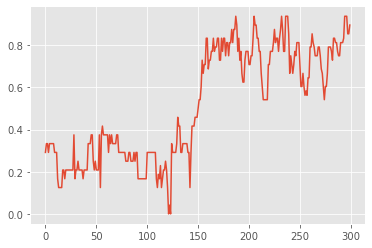

In [10]:
plt.plot(A11balancedaccuracystart)

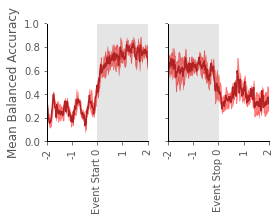

In [7]:
fig, ax = plt.subplots(1,2, figsize = (4,3), sharey = True)

#ax[0].plot(A6balancedaccuracystart, color = 'gray', alpha = 0.25)
#ax[0].plot(A8balancedaccuracystart, color = 'gray', alpha = 0.5)
#ax[0].plot(A10balancedaccuracystart, color = 'gray', alpha = 0.75)
#ax[0].plot(A11balancedaccuracystart, color = 'gray')

#ax[1].plot(A6balancedaccuracystop, color = 'gray', alpha = 0.25)
#ax[1].plot(A8balancedaccuracystop, color = 'gray', alpha = 0.5)
#ax[1].plot(A10balancedaccuracystop, color = 'gray', alpha = 0.75)
#ax[1].plot(A11balancedaccuracystop, color = 'gray')

ax[0].plot(startaccuracymean, color = 'firebrick')
ax[1].plot(stopaccuracymean, color = 'firebrick')

ax[0].fill_between(np.arange(len(startaccuracysem)), startaccuracymean-startaccuracysem, startaccuracymean+startaccuracysem, color = 'red', alpha = 0.5)
ax[1].fill_between(np.arange(len(stopaccuracysem)), stopaccuracymean-stopaccuracysem, stopaccuracymean+stopaccuracysem, color = 'red', alpha = 0.5)

ax[0].axvspan(150, 300, color = 'k', alpha = 0.1)
ax[1].axvspan(0, 150, color = 'k', alpha = 0.1)

#ax[0].vlines(150, 0, 1, linestyle = '--', alpha = 0.5, color = 'k')
#ax[1].vlines(150, 0,1, linestyle = '--', alpha = 0.5, color = 'k')

ax[0].set_xlim(30, 270)
ax[0].set_xticks((30, 90, 150, 210, 270))

ax[1].set_xlim(30, 270)
ax[1].set_xticks((30,90,150,210,270))

ax[0].set_xticklabels((-2, -1, 'Event Start '+str(0), 1, 2), rotation = 90)
ax[1].set_xticklabels((-2, -1, 'Event Stop ' +str(0), 1, 2), rotation = 90)

ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor('white')
ax[0].spines['left'].set_color('k')
ax[0].spines['bottom'].set_color('k')
ax[1].set_facecolor('white')
ax[1].spines['left'].set_color('k')
ax[1].spines['bottom'].set_color('k')

ax[0].set_ylim(0,1)

ax[0].set_ylabel('Mean Balanced Accuracy')
plt.rcParams['svg.fonttype'] = 'none'
plt.tight_layout()
#plt.savefig('F:/Figure3_New/LDAbeforeandafter_allresponsive.svg', format = 'svg', dpi = 500, transparent = True)

In [32]:
beforepresentationmean = np.mean(np.hstack((np.mean(A6balancedaccuracystart[:150]), np.mean(A8balancedaccuracystart[:150]), np.mean(A10balancedaccuracystart[:150]), np.mean(A11balancedaccuracystart[:150]))))

beforepresentationsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystart[:150]), np.mean(A8balancedaccuracystart[:150]), np.mean(A10balancedaccuracystart[:150]), np.mean(A11balancedaccuracystart[:150]))))

afterpresentationmean = np.mean(np.hstack((np.mean(A6balancedaccuracystart[150:]), np.mean(A8balancedaccuracystart[150:]), np.mean(A10balancedaccuracystart[150:]), np.mean(A11balancedaccuracystart[150:]))))

afterpresentationsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystart[150:]), np.mean(A8balancedaccuracystart[150:]), np.mean(A10balancedaccuracystart[150:]), np.mean(A11balancedaccuracystart[150:]))))

beforeremovalmean = np.mean(np.hstack((np.mean(A6balancedaccuracystop[:150]), np.mean(A8balancedaccuracystop[:150]), np.mean(A10balancedaccuracystop[:150]), np.mean(A11balancedaccuracystop[:150]))))

beforeremovalsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystop[:150]), np.mean(A8balancedaccuracystop[:150]), np.mean(A10balancedaccuracystop[:150]), np.mean(A11balancedaccuracystop[:150]))))

afterremovalmean = np.mean(np.hstack((np.mean(A6balancedaccuracystop[150:]), np.mean(A8balancedaccuracystop[150:]), np.mean(A10balancedaccuracystop[150:]), np.mean(A11balancedaccuracystop[150:]))))

afterremovalsem = stats.sem(np.hstack((np.mean(A6balancedaccuracystop[150:]), np.mean(A8balancedaccuracystop[150:]), np.mean(A10balancedaccuracystop[150:]), np.mean(A11balancedaccuracystop[150:]))))

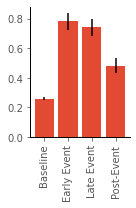

In [38]:
fig, ax = plt.subplots(1, figsize = (2,3))

ax.bar((0,1,2,3), (beforepresentationmean, afterpresentationmean, beforeremovalmean, afterremovalmean), yerr = (beforepresentationsem, afterpresentationsem, beforeremovalsem, afterremovalsem))

ax.grid(False)
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

ax.set_xticks((0,1, 2,3))
ax.set_xticklabels(('Baseline', 'Early Event', 'Late Event', 'Post-Event'), rotation = 90)

plt.tight_layout()

plt.savefig('F:/Figure3_New/LDAbeforeandafter_quantification.svg', format = 'svg', dpi = 500, transparent = True)

In [60]:
np.mean(A6balancedaccuracystop[150:])

0.5841666666666666